In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox

In [7]:
df = pd.read_csv('Train.csv')

# Stage 2

## Data Preprocessing

In [8]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
df_new = df.drop(columns=['ID'])

In [10]:
#Mengubah isi kolom warehouse block dari F menjadi E
df_new['Warehouse_block'] = df_new['Warehouse_block'].replace(['F'], ['E'])

In [11]:
#Mengubah kolom Reached_on_Time
df_new.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_Time'}, inplace = True)

Lakukan Pembersihan data, sesuai yang diajarkan di kelas, seperti: <br>
* a. Handle missing values <br>
* b. Handle duplicated data <br>
* c. Handle outliers <br>
* d. Feature transformation <br>
* e. Feature encoding <br>
* f. Handle class imbalance <br>
* Dilaporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan <br>

* Tetap tuliskan jika memang tidak ada yang perlu di handle (contoh: "Tidak perlu feature encoding karena semua feature sudah numerical" atau "Outlier tidak di handle karena akan fokus menggunakan model yang robust terhadap outlier")

# A. Handle missing values

In [12]:
df_new.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

Tidak ada nilai yang hilang sehingga tidak ada yang harus di handle

# B. Handle Duplicated data

In [13]:
df_new.duplicated().sum()

0

Tidak ada values yang duplikasi sehingga tidak ada data yang harus di hande

# C. Handle outliers

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


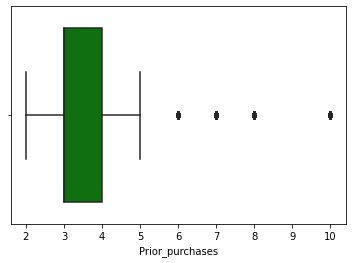

In [14]:
sns.boxplot(x=df_new["Prior_purchases"], color='green', orient='v');

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


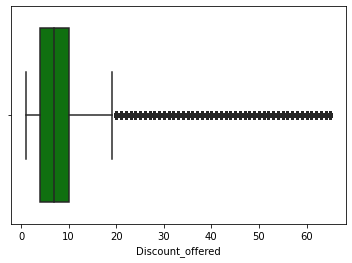

In [15]:
sns.boxplot(x=df_new["Discount_offered"], color='green', orient='v');

Kesimpulan
* Outlier pada kolom prior purchases tidak perlu dibuang dikarenakan nilainya masih dalam batas wajar (kecuali ada nilai yang < 0 sehingga harus dilakukan drop pada kolom tersebut)
* Outlier pada kolom Discount offered tidak perlu dibuang dikarenakan discount yang diberikan masih dalam batas wajar (karena discount yang diberikan tidak melebihi 100%)

# D. Feature Transformation

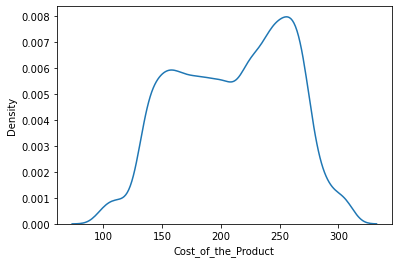

In [16]:
sns.kdeplot(x=df_new["Cost_of_the_Product"]);

In [17]:
# Fungsi untuk mengetahui berapa skewed grafik tersebut
""" jika nilai skewed -0.5 atau 0.5 adalah Fairy Symmetrical
    jika nilai skewed -0.5 sampai -1.0 dan 0.5 sampai 1.0 adalah Moderate Skewed
    jika nilai skewed < -1.0 dan > 1.0 adalah Highly Skewed
"""
df_new[('Cost_of_the_Product')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Cost_of_the_Product
0,skew,-0.157117
1,kurtosis,-0.972160


In [18]:
df_new['Cost_of_the_Product'] = np.random.exponential(size=10999)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


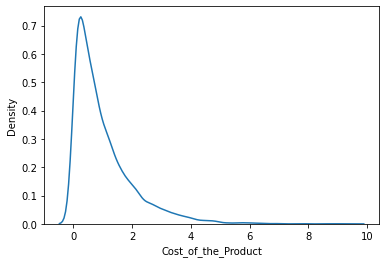

In [19]:
sns.distplot(df_new['Cost_of_the_Product'], hist=False, kde=True);

In [20]:
df_new['Cost_of_the_Product_tf'], _ = boxcox(df_new['Cost_of_the_Product'])

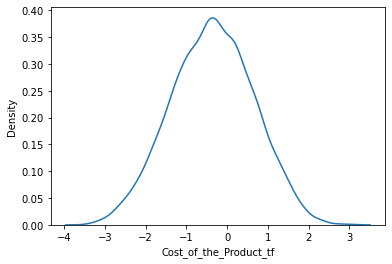

In [21]:
sns.kdeplot(x=df_new["Cost_of_the_Product_tf"]);

In [22]:
df_new['Cost_of_the_Product_tf'] = StandardScaler().fit_transform(df_new['Cost_of_the_Product'].values.reshape(len(df), 1))

## Discount Offered

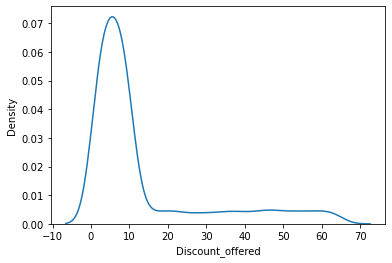

In [23]:
sns.kdeplot(x=df_new["Discount_offered"]);

In [24]:
df_new[('Discount_offered')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Discount_offered
0,skew,1.798929
1,kurtosis,2.000586


In [25]:
df_new['Discount_offered'] = np.random.exponential(size=10999)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


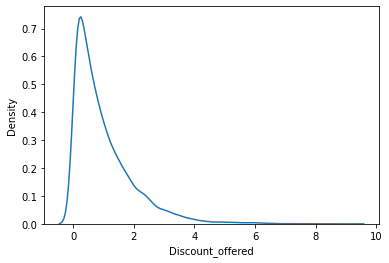

In [26]:
sns.distplot(df_new['Discount_offered'], hist=False, kde=True);

In [27]:
df_new['Discount_offered_tf'], _ = boxcox(df_new['Discount_offered'])

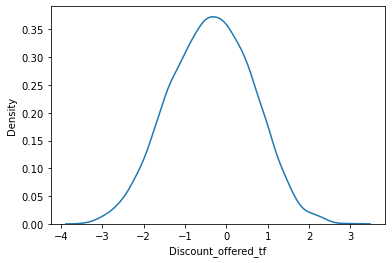

In [28]:
sns.kdeplot(x=df_new["Discount_offered_tf"]);

In [29]:
df_new['Discount_offered_tf'] = StandardScaler().fit_transform(df_new['Discount_offered'].values.reshape(len(df), 1))

## Weight in gms

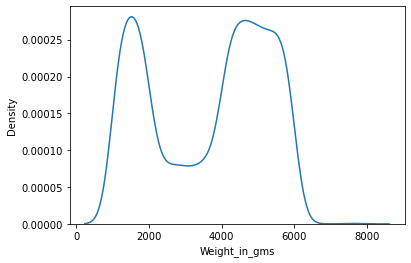

In [30]:
sns.kdeplot(x=df_new['Weight_in_gms']);

In [31]:
df_new[('Weight_in_gms')].agg(['skew', 'kurtosis']).transpose().reset_index()

,index,Weight_in_gms
0,skew,-0.249747
1,kurtosis,-1.447671


In [32]:
df_new['Weight_in_gms'] = np.random.exponential(size=10999)

C:\Users\ASUS TUF\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


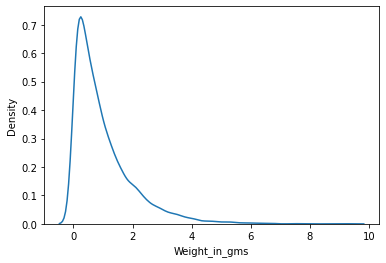

In [33]:
sns.distplot(df_new['Weight_in_gms'], hist=False, kde=True);

In [34]:
df_new['Weight_in_gms_tf'], _ = boxcox(df_new['Weight_in_gms'])

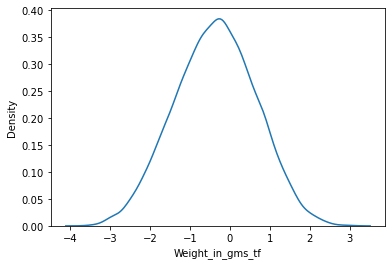

In [35]:
sns.kdeplot(x=df_new['Weight_in_gms_tf']);

In [36]:
df_new['Weight_in_gms_tf'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Warehouse_block         10999 non-null  object 
 1   Mode_of_Shipment        10999 non-null  object 
 2   Customer_care_calls     10999 non-null  int64  
 3   Customer_rating         10999 non-null  int64  
 4   Cost_of_the_Product     10999 non-null  float64
 5   Prior_purchases         10999 non-null  int64  
 6   Product_importance      10999 non-null  object 
 7   Gender                  10999 non-null  object 
 8   Discount_offered        10999 non-null  float64
 9   Weight_in_gms           10999 non-null  float64
 10  Reached_on_Time         10999 non-null  int64  
 11  Cost_of_the_Product_tf  10999 non-null  float64
 12  Discount_offered_tf     10999 non-null  float64
 13  Weight_in_gms_tf        10999 non-null  float64
dtypes: float64(6), int64(4), object(4)
mem

In [38]:
df_new = df_new.drop(columns=['Discount_offered', 'Cost_of_the_Product','Weight_in_gms'])

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Warehouse_block         10999 non-null  object 
 1   Mode_of_Shipment        10999 non-null  object 
 2   Customer_care_calls     10999 non-null  int64  
 3   Customer_rating         10999 non-null  int64  
 4   Prior_purchases         10999 non-null  int64  
 5   Product_importance      10999 non-null  object 
 6   Gender                  10999 non-null  object 
 7   Reached_on_Time         10999 non-null  int64  
 8   Cost_of_the_Product_tf  10999 non-null  float64
 9   Discount_offered_tf     10999 non-null  float64
 10  Weight_in_gms_tf        10999 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 945.4+ KB


# E. Feature encoding

In [40]:
df_new.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf
0,D,Flight,4,2,3,low,F,1,0.671334,-0.457650,-1.468240
1,E,Flight,4,5,2,low,M,1,-0.405201,1.031054,-0.333893
2,A,Flight,2,2,4,low,M,1,-0.847475,0.165101,-0.159002
3,B,Flight,3,3,4,medium,M,1,4.926276,1.244338,-1.502484
4,C,Flight,2,2,3,medium,F,1,-0.563795,-0.360743,-0.703244


In [41]:
# jenis_kelamin & pendidikan label encoding
mapping_jenis_kelamin = {
    'F' : 0,
    'M' : 1
}

mapping_warehouse_block = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df_new['Gender'] = df_new['Gender'].map(mapping_jenis_kelamin)
df_new['Warehouse_block'] = df_new['Warehouse_block'].map(mapping_warehouse_block)
df_new['Product_importance'] = df_new['Product_importance'].map(mapping_product_importance)

In [42]:
# one hot encoding
for cat in ['Mode_of_Shipment']:
    onehots = pd.get_dummies(df_new[cat], prefix=cat)
    df_new = df_new.join(onehots)

In [43]:
df_new.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,Flight,4,2,3,0,0,1,0.671334,-0.457650,-1.468240,1,0,0
1,4,Flight,4,5,2,0,1,1,-0.405201,1.031054,-0.333893,1,0,0
2,0,Flight,2,2,4,0,1,1,-0.847475,0.165101,-0.159002,1,0,0
3,1,Flight,3,3,4,1,1,1,4.926276,1.244338,-1.502484,1,0,0
4,2,Flight,2,2,3,1,0,1,-0.563795,-0.360743,-0.703244,1,0,0


In [44]:
df_new = df_new.drop(columns= 'Mode_of_Shipment')

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Warehouse_block          10999 non-null  int64  
 1   Customer_care_calls      10999 non-null  int64  
 2   Customer_rating          10999 non-null  int64  
 3   Prior_purchases          10999 non-null  int64  
 4   Product_importance       10999 non-null  int64  
 5   Gender                   10999 non-null  int64  
 6   Reached_on_Time          10999 non-null  int64  
 7   Cost_of_the_Product_tf   10999 non-null  float64
 8   Discount_offered_tf      10999 non-null  float64
 9   Weight_in_gms_tf         10999 non-null  float64
 10  Mode_of_Shipment_Flight  10999 non-null  uint8  
 11  Mode_of_Shipment_Road    10999 non-null  uint8  
 12  Mode_of_Shipment_Ship    10999 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 891.6 KB


# F. Handle class imbalance

In [46]:
print(df_new['Reached_on_Time'].value_counts(normalize=True))

1    0.596691
0    0.403309
Name: Reached_on_Time, dtype: float64


Kesimpulannya tidak ada data yang harus di lakukan metode class imbalance dikarenakan data yang kita punya memiliki distribusi bimodal/negatif

In [48]:
df_new.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached_on_Time,Cost_of_the_Product_tf,Discount_offered_tf,Weight_in_gms_tf,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,3,4,2,3,0,0,1,0.671334,-0.457650,-1.468240,1,0,0
1,4,4,5,2,0,1,1,-0.405201,1.031054,-0.333893,1,0,0
2,0,2,2,4,0,1,1,-0.847475,0.165101,-0.159002,1,0,0
3,1,3,3,4,1,1,1,4.926276,1.244338,-1.502484,1,0,0
4,2,2,2,3,1,0,1,-0.563795,-0.360743,-0.703244,1,0,0


# 2. Feature Engineering

Cek feature yang ada sekarang, lalu lakukan: <br>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
* Membuang kolom id karena kolom id bersifat unique

B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
* (Logistic performance) Membuat pola berdasarkan weight in grams, dan memprediksi mode pengiriman yang cocok untuk berat yang sudah tertera pada data

C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin sangat membantu performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan) <br>
* Tanggal order
* Tanggal delivery
* Lokasi order
* Tipe barang yang dikirim
* Jenis layanan 
<br>

* Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: "Semua feature digunakan untuk modeling (tidak ada yang dihapus), karena semua feature relevan")